<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/Model_temp_154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
feature = pd.read_excel('/content/Koordinat dan Input Skenario.xlsx',sheet_name='InputSkenario')
label = pd.read_excel('/content/data_big.xlsx',sheet_name='Sheet3')

0      0
1      0
2      0
3      0
4      0
      ..
187    1
188    1
189    1
190    1
191    1
Name: Fan/o6, Length: 192, dtype: int64

In [ ]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [ ]:
feature.count()

Jendela                               192
AC                                    192
Arah Sudut Kecepatan Angin derajat    192
Nilai Kecepatan Angin                 192
Dry Bulb Temperature                  192
Fan/i1                                192
Fan/i4                                192
Fan/i6                                192
dtype: int64

In [ ]:
label.count()

koor_x                   29568
koor_y                   29568
koor_z                   29568
Vx                       29568
Vy                       29568
Vz                       29568
Temp                     29568
source                   29568
Jendela                  29568
AC                       29568
sudut angin              29568
Nilai Kecepatan Angin    29568
Dry Bulb Temperature     29568
dtype: int64

In [ ]:
array_y = []
for i in range(154):
  frame= label[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z',],axis=1)
  frame = frame.drop(['Vx','Vy','Vz','Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','source'],axis=1)
  array_y.append(frame)

In [ ]:
array_y[153]

,Temp
153,29.056709
307,30.032925
461,29.968340
615,29.310209
769,29.309998
...,...
28951,26.147747
29105,25.840082
29259,23.635651
29413,24.730881


In [ ]:
! mkdir models
y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LogisticRegression, Ridge, ElasticNet,LassoLars
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(154):
  x = np.array(feature)
  y = np.array(array_y[i])
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = LassoLars(alpha=0.1, normalize=False)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}',)

mkdir: cannot create directory ‘models’: File exists


In [ ]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(154):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [ ]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [ ]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((154,), (154,), (154, 29), (154, 29, 1))

In [ ]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

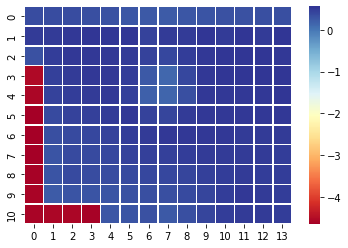

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

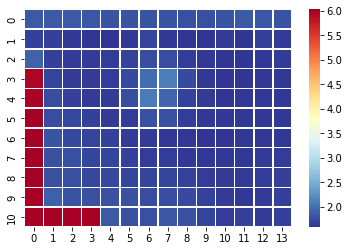

In [ ]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [ ]:
scenarios = 2  #0-28
indexing = 0    #0-3 (Vx,Vy,Vz,temp)

In [ ]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[...,scenarios]
a = np.array(a)
b = np.array(b)
a = a.reshape(11,14)
b = b.reshape(11,14)
print('reshaped')

reshaped


In [ ]:
!zip -r /content/models_temp_154_a0.zip /content/models

updating: content/models/ (stored 0%)
updating: content/models/model 53 (deflated 41%)
updating: content/models/model 81 (deflated 40%)
updating: content/models/model 47 (deflated 38%)
updating: content/models/model 32 (deflated 40%)
updating: content/models/model 128 (deflated 39%)
updating: content/models/model 116 (deflated 39%)
updating: content/models/model 115 (deflated 39%)
updating: content/models/model 18 (deflated 39%)
updating: content/models/model 7 (deflated 40%)
updating: content/models/model 27 (deflated 40%)
updating: content/models/model 134 (deflated 40%)
updating: content/models/model 79 (deflated 41%)
updating: content/models/model 54 (deflated 41%)
updating: content/models/model 80 (deflated 40%)
updating: content/models/model 132 (deflated 41%)
updating: content/models/model 60 (deflated 41%)
updating: content/models/model 130 (deflated 39%)
updating: content/models/model 123 (deflated 40%)
updating: content/models/model 127 (deflated 39%)
updating: content/models